# Chapter 2 - Phase Plane Analysis

Phase plane analysis is a graphical method that is used with first- and second-order systems (or systems that can be approximated as such). By graphically solving the differential equations, we obtain a family of trajectories that allow us to see the motion of the system.

## Advantages

- Visualization of the system
    - see what happens with various initial conditions with out solving differential equations
- small or smooth trajectories to strong nonlinearities and to “hard” trajectories
- control systems can be approximated as second-order systems

## Disadvantages
- restricted to first- or second-order systems

## Concepts of Phase Plane Analysis

### Phase Portraits

We shall concern our study with second order autonomous systems given by

\begin{align*}
\dot{x}_1 &= f_1 ( x_1, x_2 ) \\
\dot{x}_2 &= f_2 ( x_1, x_2 )
\end{align*}

where $\mathbf{x} (t)$ is a solution to (1) and (2) with initial conditions $\mathbf{x} (0) = \mathbf{x}_0$ and is represented as a curve on the phase plane varying from $t \in [0, 1)$ and is called a phase plane trajectory. A family of these curves (solutions with varying initial values) is a phase portrait.

#### Example: Phase portrait of an undamped pendulum [1]

An undamped pendulum is shown in Figure 1(a) and described by

\begin{equation*}
\ddot{y} + \sin (y) = 0
\end{equation*}

The above equation can be reduced to a system of two first-order equations

\begin{align*}
\dot{y}_1 & = y_2 \\
\dot{y}_2 & = \sin (y_1)
\end{align*}

We can use Python to solve this system numerically and plot the phase portrait. The following code will plot a vector field for the system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Define a function that describes the system dynamics
def undamped_pendulum(Y, t):
    """This function gives the dynamics for an undamped pendulum"""
    y1, y2 = Y
    return [y2, -np.sin(y1)]

y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        y_prime = undamped_pendulum([x, y], t)
        u[i,j] = y_prime[0]
        v[i,j] = y_prime[1]
     

plt.figure(figsize=(18,6), dpi=180)
Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-2, 8])
plt.ylim([-4, 4])

(-4, 4)

Now, let's plot a few different trajectories for different initial conditions.

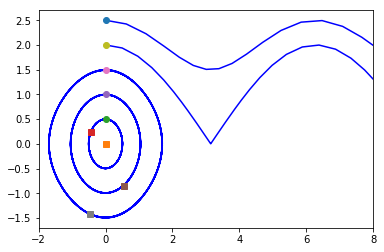

In [2]:
from scipy.integrate import odeint

for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    t_span = np.linspace(0, 50, 200)
    y0 = [0.0, y20]
    ys = odeint(undamped_pendulum, y0, t_span)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([-2, 8])
plt.show()

Let's put it all together. To make this last script self-contained we'll basically just copy-and-paste the previous two scripts and combine.

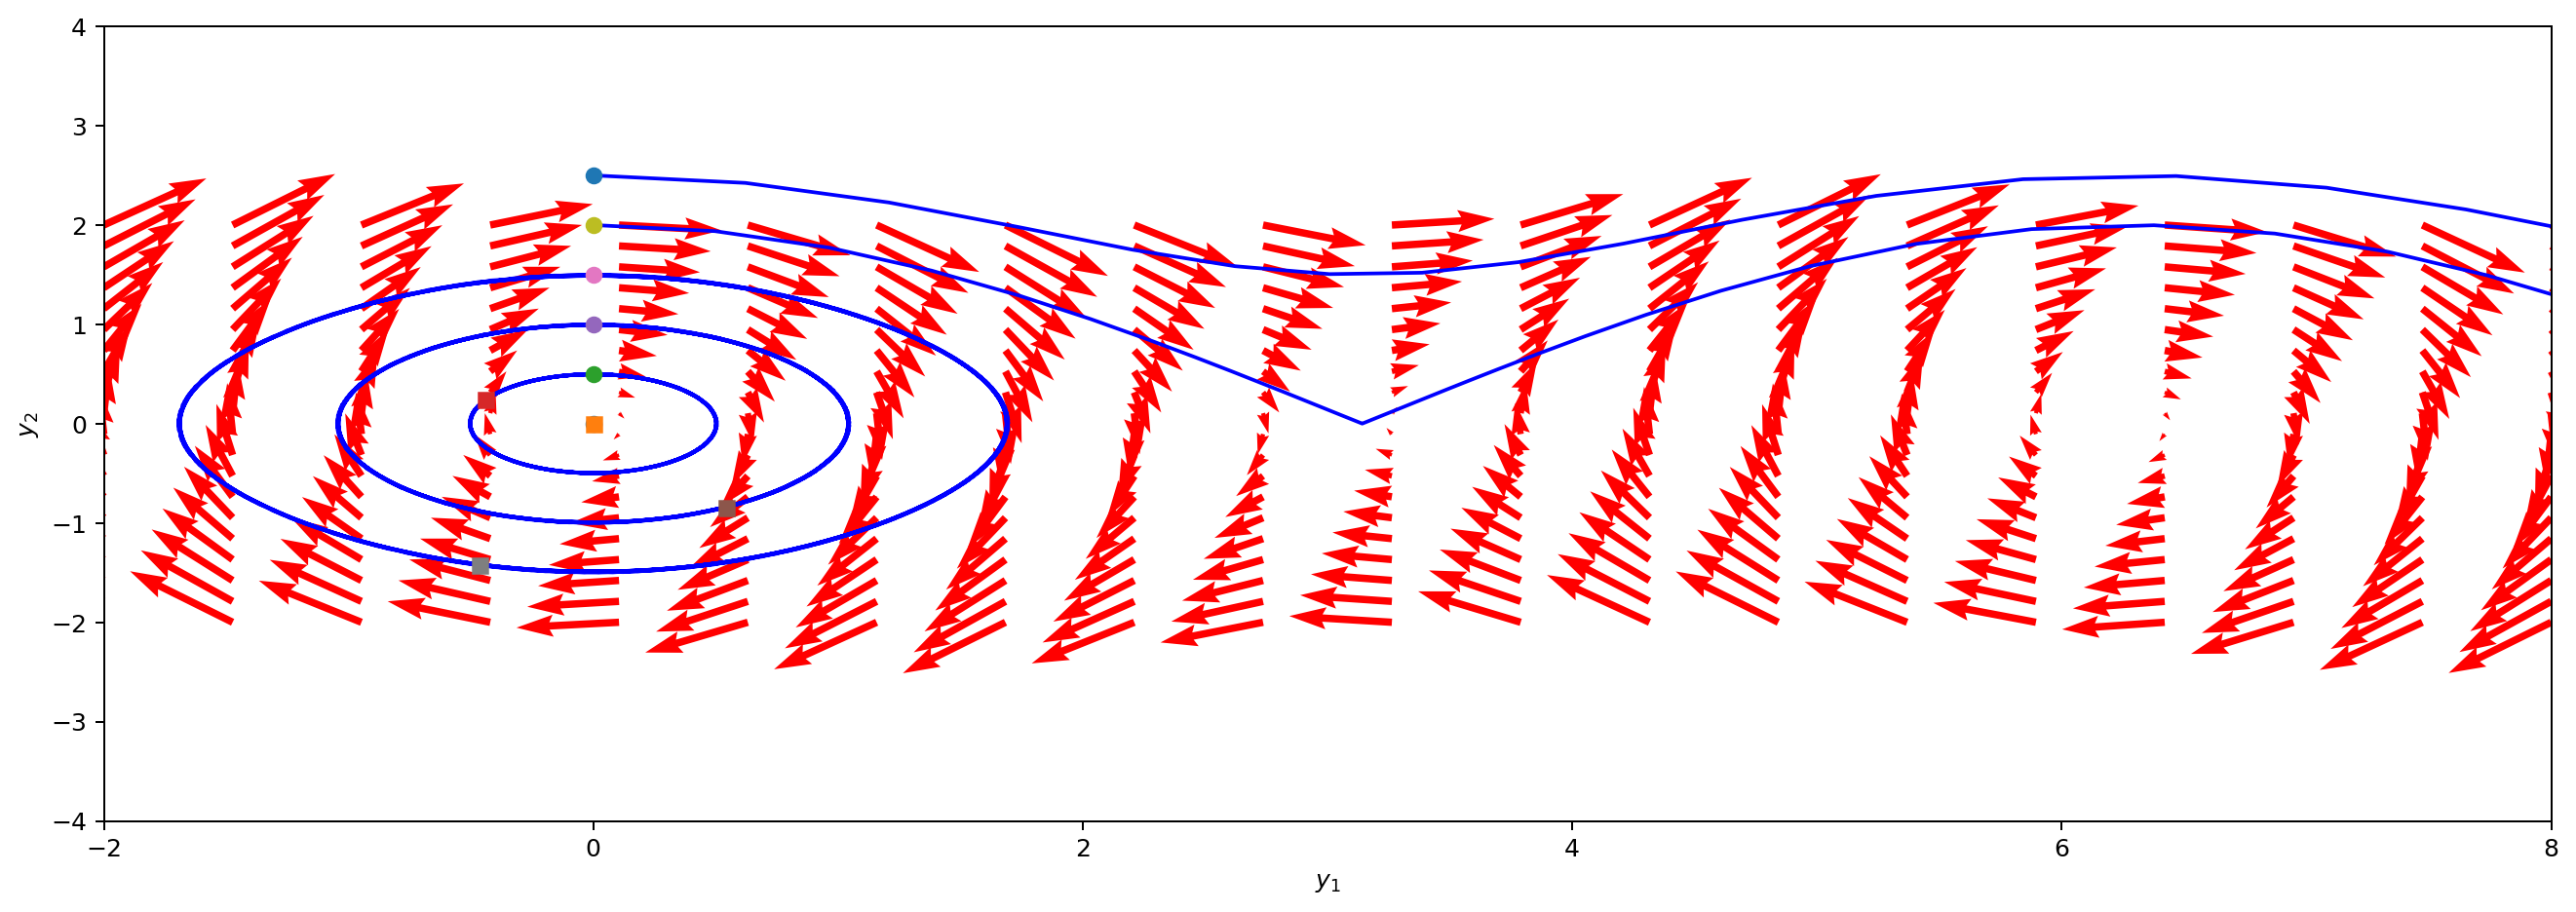

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# Define a function that describes the system dynamics
def undamped_pendulum(Y, t):
    """This function gives the dynamics for an undamped pendulum"""
    y1, y2 = Y
    return [y2, -np.sin(y1)]

y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        y_prime = undamped_pendulum([x, y], t)
        u[i,j] = y_prime[0]
        v[i,j] = y_prime[1]
     

plt.figure(figsize=(18,6), dpi=180)
Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-2, 8])
plt.ylim([-4, 4])

for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    t_span = np.linspace(0, 50, 200)
    y0 = [0.0, y20]
    ys = odeint(undamped_pendulum, y0, t_span)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([-2, 8])
plt.show()

What this shows is that for the undamped pendulum, there is a singular (equilibrium) point at the coordinate $(0, 0)$, there are some limit cycles around the singular point, and these can be unstable (more on all of this in later notebooks).

[1] This example is from [CMU's Kitchin Research Group](http://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/).